# **Phishing Website Detection by Deeplearning Techniques**
*Final Project of ENPM 809K*


# 1**. Main Objective:**
This project's primary goal is to build a reliable system that extracts and analyzes important characteristics from URLs in order to identify phishing websites. Creating an effective feature extraction algorithm that ranks indicators of phishing attempts in order of importance is part of this. The research intends to use an accurate URL classification machine learning model trained on a variety of datasets. Furthermore, the system is going to be seamlessly incorporated into a real-time detection platform featuring an easy-to-use user interface. It will also go through extensive scalability and performance testing, and provide a feedback mechanism for ongoing model improvement. The project will result in a secure, compliant, well-documented solution for efficient detection of phishing websites.

# 2**. Loading Data:**
The extracted features are saved in a CSV file, as demonstrated in the 'Feature Extraction.ipynb' document. Subsequently, this CSV file is imported into the notebook and stored as a dataframe.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/ENPM809K Project'

In [ ]:
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 975.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103246 sha256=402b53742619205ab6b86bee8218b75fe178a3d57555dcc5ab2cf0d9a5b34306
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [ ]:
# Importing essential libraries for data manipulation and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
url_features= pd.read_csv('url_features.csv')
url_features.head()

,URL,Using_IP,Length,Tiny_URL,At_Symbol,Redirection,Prefix/Suffix,Sub_Domain,URL_Depth,Https_URL,...,DomainRegLen,Google_Index,Status_Bar_Cust,Disable_Right_Click,Iframe_Redirect,Anchor_URL,Server_Form_Handler,Using_Popup_Window,Links_Pointing_Page,Label
0,http://www.ticketsparapymes.codeplex.com/,1,1,-1,1,1,1,-1,0,1,...,0,-1,0,0,0,0,0,0,0,0
1,http://www.my-cataract-eye-drops.com/,1,1,1,1,1,-1,0,0,1,...,0,-1,0,0,0,0,0,0,0,0
2,http://www.forums.appleinsider.com/showthread....,1,0,1,1,1,1,-1,1,1,...,0,-1,0,0,0,0,0,0,0,0
3,http://www.wn.com/Lambda_Chi_Alpha,1,1,1,1,1,1,0,1,1,...,0,-1,1,1,1,0,0,-1,1,0
4,http://www.en-pi.facebook.com/people/Connor-La...,1,0,1,1,1,-1,-1,3,1,...,0,-1,0,0,0,0,0,0,0,0


# 3**. Familiarizing with Data:**
A few dataframe methods are employed in this step to examine the data and its characteristics.

In [ ]:
# Generating descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution for URL features.
url_features.describe()

,Using_IP,Length,Tiny_URL,At_Symbol,Redirection,Prefix/Suffix,Sub_Domain,URL_Depth,Https_URL,NonStdPort,...,DomainRegLen,Google_Index,Status_Bar_Cust,Disable_Right_Click,Iframe_Redirect,Anchor_URL,Server_Form_Handler,Using_Popup_Window,Links_Pointing_Page,Label
count,37995.0,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,...,37995.0,37995.0,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000,37995.000000
mean,1.0,0.253454,0.853612,0.987998,0.985893,0.505882,-0.439347,1.536307,0.095197,0.998842,...,0.0,-1.0,0.699645,0.698697,0.699224,-0.304382,-0.504698,0.646006,-0.142361,0.500013
std,0.0,0.858788,0.520916,0.154466,0.167380,0.862614,0.664309,1.517065,0.995472,0.048113,...,0.0,0.0,0.458419,0.459861,0.459061,0.510376,0.535617,0.531346,0.741909,0.500007
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,...,0.0,-1.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.0,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,...,0.0,-1.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
50%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,0.0,-1.0,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,...,0.0,-1.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,...,0.0,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Displaying the first five rows of the URL features dataset to get an initial understanding of the data and its structure.
url_features.head()

,URL,Using_IP,Length,Tiny_URL,At_Symbol,Redirection,Prefix/Suffix,Sub_Domain,URL_Depth,Https_URL,...,DomainRegLen,Google_Index,Status_Bar_Cust,Disable_Right_Click,Iframe_Redirect,Anchor_URL,Server_Form_Handler,Using_Popup_Window,Links_Pointing_Page,Label
0,http://www.ticketsparapymes.codeplex.com/,1,1,-1,1,1,1,-1,0,1,...,0,-1,0,0,0,0,0,0,0,0
1,http://www.my-cataract-eye-drops.com/,1,1,1,1,1,-1,0,0,1,...,0,-1,0,0,0,0,0,0,0,0
2,http://www.forums.appleinsider.com/showthread....,1,0,1,1,1,1,-1,1,1,...,0,-1,0,0,0,0,0,0,0,0
3,http://www.wn.com/Lambda_Chi_Alpha,1,1,1,1,1,1,0,1,1,...,0,-1,1,1,1,0,0,-1,1,0
4,http://www.en-pi.facebook.com/people/Connor-La...,1,0,1,1,1,-1,-1,3,1,...,0,-1,0,0,0,0,0,0,0,0


In [ ]:
# Randomly selecting and displaying 5 rows from the URL features dataset to get a varied overview of the data.
url_features.sample(5)

,URL,Using_IP,Length,Tiny_URL,At_Symbol,Redirection,Prefix/Suffix,Sub_Domain,URL_Depth,Https_URL,...,DomainRegLen,Google_Index,Status_Bar_Cust,Disable_Right_Click,Iframe_Redirect,Anchor_URL,Server_Form_Handler,Using_Popup_Window,Links_Pointing_Page,Label
9694,http://www.jeremysgluck.blogspot.com/,1,1,-1,1,1,1,-1,0,1,...,0,-1,1,1,1,0,0,1,1,0
23153,https://tinyurl.com/AvisodeSeguridad,1,1,-1,1,1,1,1,1,-1,...,0,-1,1,1,1,0,-1,1,1,1
1922,http://www.thewrongadvices.com/zeitgeist/Jenni...,1,0,1,1,1,1,0,2,1,...,0,-1,1,1,1,-1,-1,1,-1,0
4952,http://www.twitter.com/soireedubasket,1,1,1,1,1,1,0,1,1,...,0,-1,1,1,1,0,1,1,1,0
21557,https://swisspost-zoll.web.app/,1,1,1,1,1,-1,0,0,-1,...,0,-1,1,1,1,-1,-1,1,-1,1


# 4**. Visualizing the data:**
To determine the distribution of the data and the relationships between the features, a small number of plots and graphs are presented.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


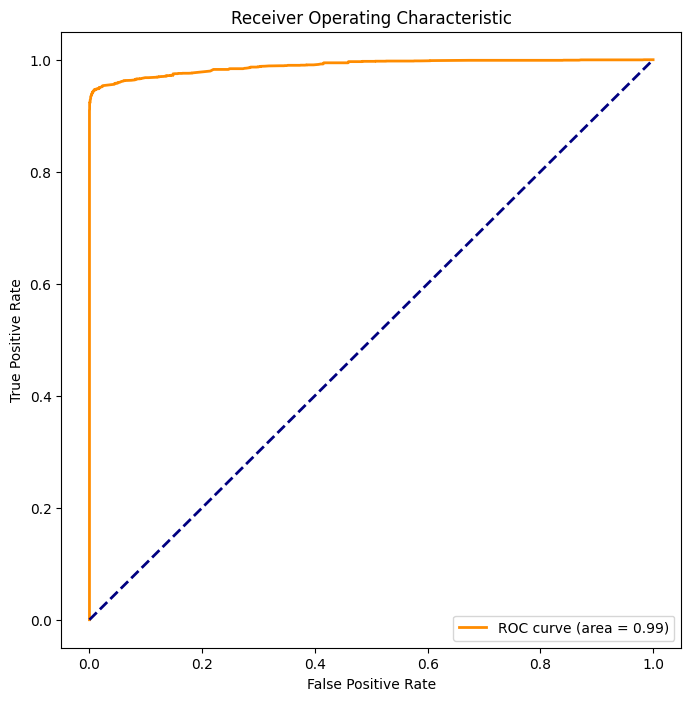

In [ ]:
#importing packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Assuming 'X' as features and 'y' as the target variable
X = url_features.drop(['Label','URL'], axis=1)
y = url_features['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = LogisticRegression()

# Fit the classifier
classifier.fit(X_train, y_train)

# Predict the probabilities
y_probs = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<ipython-input-11-290f3dd9ff61>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = url_features.corr()


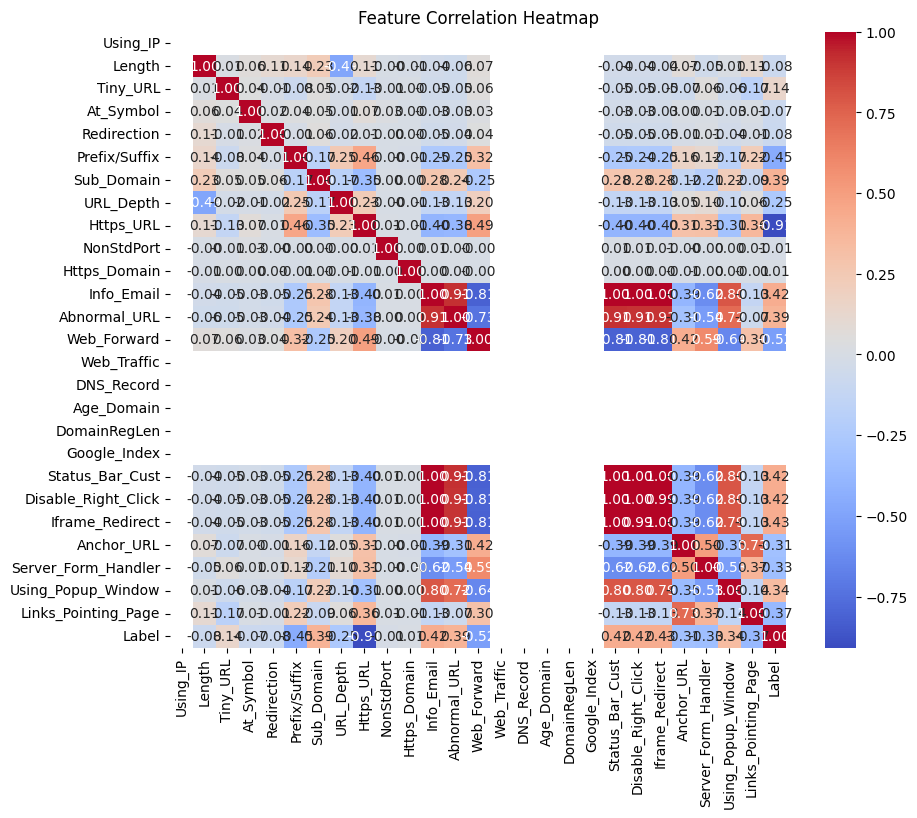

In [ ]:
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = url_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()



# 5. Preparing the data for training
A tokenizer is initialized to process URLs from a dataset, converting them into fixed-length sequences of integers. This prepares the data for neural network input. The dataset is then split into training and testing subsets (80% training, 20% testing) using the URLs as features and their corresponding labels as targets. This structured data is essential for training and evaluating machine learning models.


In [ ]:
#importing packages
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'url' is the feature and 'label' is the target variable
tokenizer = Tokenizer(num_words=5000, oov_token="OOV")
tokenizer.fit_on_texts(url_features['URL'])

# Convert text to sequence of integers
sequences = tokenizer.texts_to_sequences(url_features['URL'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

# Labels
labels = url_features['Label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
print(X_train)

[[   5    1    1 ...    0    0    0]
 [   5    6   24 ...    0    0    0]
 [   3    4    1 ...    0    0    0]
 ...
 [   3    4  307 ...    0    0    0]
 [   3    4 4278 ...    0    0    0]
 [   3    4  369 ...    0    0    0]]


# 6. Training the model
The dataset presented is evidently suited for a supervised machine learning task. Supervised learning encompasses two primary categories: classification and regression.

In this particular case, we are dealing with a classification problem, where the goal is to categorize input URLs as either phishing (labelled as 1) or legitimate (labelled as 0). To address this task, we plan to employ a variety of supervised classification models, which include:

1.Support Vector Machines \\
2.Multilayer Perceptrons \\
3.Auto encoder Neural Network \\
4.Convolutional Neural Network (CNN) \\
5.Recurrent Neural Network (RNN)

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score


# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **6.1 Support Vector Machines (SVM)**
A Support Vector Machine is an algorithm utilized for both classification and regression challenges. Unlike neural networks that consist of layers and neurons, SVMs operate by discovering the most efficient hyperplane that segregates different classes in the feature space. The support vectors are the crucial elements that define the position of this hyperplane. Even in high-dimensional spaces, SVMs demonstrate impressive effectiveness, and they offer versatility through the ability to specify various kernel functions.

In [ ]:
# Importing the Support Vector Classifier (SVC) class from scikit-learn's svm module
from sklearn.svm import SVC

# Creating an instance of the SVC model.
# Here, we are using a linear kernel for the SVM, setting the regularization parameter C to 1.0, and fixing the random state to ensure reproducibility.
svm = SVC(kernel='linear', C=1.0, random_state=12)

# Training the SVM model on the training data.
# The fit function adjusts the weights of the model to minimize the error in predictions, learning from the input features X_train and corresponding labels y_train.
svm.fit(X_train, y_train)


In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [ ]:
# Calculate the accuracy on the training data by comparing the predicted labels (y_train_svm) with the actual labels (y_train).
acc_train_svm = accuracy_score(y_train, y_train_svm)

# Calculate the accuracy on the test data by comparing the predicted labels (y_test_svm) with the actual labels (y_test).
acc_test_svm = accuracy_score(y_test, y_test_svm)

# Print the accuracy on the training data, formatted to three decimal places.
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))

# Print the accuracy on the test data, formatted to three decimal places.
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))



**Storing the results:**

In [ ]:
# Saving the performance metrics of the Support Vector Machine model to the designated lists for future analysis and comparison.
storeResults('SVM', acc_train_svm, acc_test_svm)

### **6.2 Multilayer Perceptrons**
Multilayer Perceptrons represent a foundational type of neural network, encompassing an input layer, several hidden layers, and an output layer. Neurons from one layer are fully connected to neurons in the subsequent layer, with associated weights dictating the strength of these connections. The network adapts these weights during training to minimize error, learning to map inputs to the correct outputs. In contrast to autoencoders, the input and output of an MLP are not the same, positioning MLPs as a popular choice for tasks that involve predicting a target variable.

In [ ]:
# Importing the MLPClassifier from scikit-learn
from sklearn.neural_network import MLPClassifier

# Creating an instance of the Multilayer Perceptrons (MLP) model.
# The 'alpha' parameter is the regularization term that helps to reduce overfitting by penalizing large weights.
# 'hidden_layer_sizes' defines the number of layers and the number of nodes in each layer. Here, we have three hidden layers, each with 100 nodes.
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100, 100, 100]))

# Fitting the model to the training data.
# This is the step where the model learns from the data by adjusting its weights to minimize the error in predictions.
# X_train is the feature matrix for the training data, and y_train is the corresponding label vector.
mlp.fit(X_train, y_train)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
# Making predictions on the test and training data
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [ ]:
# Importing necessary libraries for evaluating model performance
from sklearn.metrics import accuracy_score

# Calculating the accuracy on the training data
# The function accuracy_score compares the predicted labels (y_train_mlp) with the actual labels (y_train)
# and returns the accuracy as a float
acc_train_mlp = accuracy_score(y_train, y_train_mlp)

# Calculating the accuracy on the test data
# Similar to the training data, it compares the predicted labels on the test set (y_test_mlp) with the actual labels (y_test)
acc_test_mlp = accuracy_score(y_test, y_test_mlp)

# Printing the accuracy results
# The format method is used to insert the accuracy values into the string and {:.3f} is used to format the float to 3 decimal places
print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.990
Multilayer Perceptrons: Accuracy on test Data: 0.982


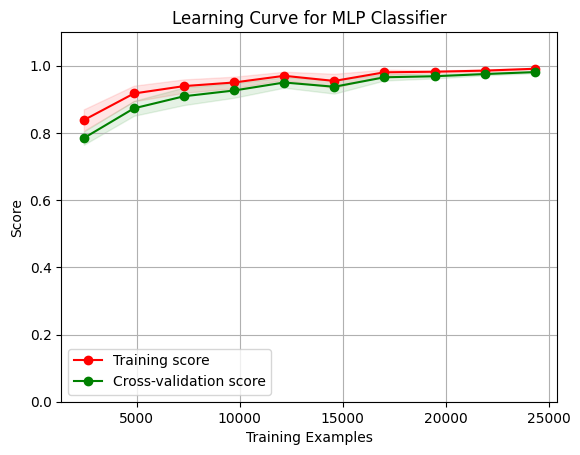

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate the average and standard deviation of the training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve for MLP Classifier')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


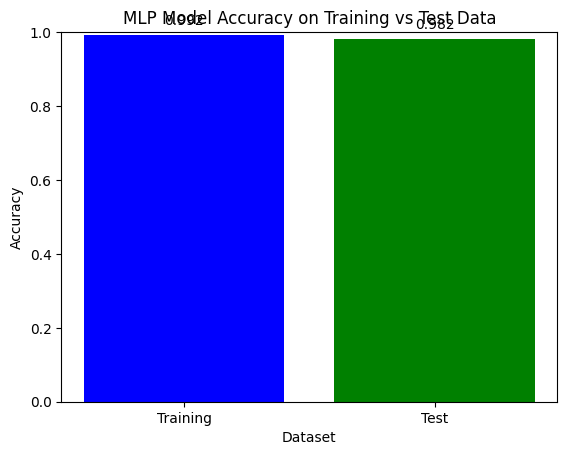

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for training and test datasets
accuracy_values = [acc_train_mlp, acc_test_mlp]
labels = ['Training', 'Test']

# Creating bar chart
plt.bar(labels, accuracy_values, color=['blue', 'green'])
# Label for the x-axis and y-axis
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('MLP Model Accuracy on Training vs Test Data')
# Setting the y-axis limits assuming accuracy is a value between 0 and 1
plt.ylim([0, 1])
# Adding text labels on top of the bars
for i, v in enumerate(accuracy_values):
    # Placing text labels above the bars with 3 decimal places, centered horizontally
    plt.text(i, v + 0.02, "{:.3f}".format(v), ha='center', va='bottom')
# Displaying the plot
plt.show()


**Storing the results:**

In [ ]:
# Saving Multilayer Perceptrons' performance metrics to the respective lists.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)


### **6.3 Auto encoder Neural Network**
An Autoencoder Neural Network is a specialized type of neural network designed to learn a compact and efficient representation of the input data. It consists of two main parts: an encoder and a decoder. The encoder compresses the input into a latent-space representation, and the decoder reconstructs the input data from this representation. The number of neurons in the input and output layers are the same, ensuring that the network can be trained to reproduce its input at the output. However, the hidden layers have fewer neurons than the input/output layers, forcing the network to learn the most important features of the data. Autoencoders are primarily used for dimensionality reduction, feature learning, and as a generative model. Unlike other neural networks, the target values for an autoencoder are the input values itself, making it an unsupervised learning model.

In [ ]:
#importing required packages
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from sklearn import metrics

In [ ]:
# Setting the dimensions for input and encoding
# Input feature dimension
input_dim = X_train.shape[1]

# Encoding dimension
encoding_dim = input_dim

# Defining the input layer of the autoencoder
input_layer = Input(shape=(input_dim, ))

# Adding the first encoding layer with L1 regularization
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-4))(input_layer)

# Adding additional encoding layers
encoder = Dense(int(encoding_dim), activation="relu")(encoder)
encoder = Dense(int(encoding_dim - 2), activation="relu")(encoder)

# Defining the code layer in the middle of the network
code = Dense(int(encoding_dim - 4), activation='relu')(encoder)

# Adding decoding layers
decoder = Dense(int(encoding_dim - 2), activation='relu')(code)
decoder = Dense(int(encoding_dim), activation='relu')(decoder)

# Defining the output layer
decoder = Dense(input_dim, activation='relu')(decoder)

# Creating the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Displaying the summary of the autoencoder model
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 98)                9898      
                                                                 
 dense_3 (Dense)             (None, 96)                9504      
                                                                 
 dense_4 (Dense)             (None, 98)                9506      
                                                                 
 dense_5 (Dense)             (None, 100)               9900  

In [ ]:
# Compiling the autoencoder model with Adam optimizer, binary cross-entropy loss, and accuracy as a metric.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the autoencoder model using the training data.
# Here, the same data is used as both input and target since it's an autoencoder.
# The model will train for 10 epochs with a batch size of 64, and 20% of the training data will be used as a validation set.
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2)


Epoch 1/50
380/380 [==============================] - 5s 7ms/step - loss: -203.1324 - accuracy: 0.0190 - val_loss: -212.1099 - val_accuracy: 0.0174
Epoch 2/50
380/380 [==============================] - 3s 8ms/step - loss: -214.8494 - accuracy: 0.0533 - val_loss: -214.4576 - val_accuracy: 0.1281
Epoch 3/50
380/380 [==============================] - 2s 6ms/step - loss: -213.7798 - accuracy: 0.0280 - val_loss: -214.7022 - val_accuracy: 0.0174
Epoch 4/50
380/380 [==============================] - 2s 5ms/step - loss: -217.2101 - accuracy: 0.0427 - val_loss: -215.4514 - val_accuracy: 0.0174
Epoch 5/50
380/380 [==============================] - 2s 4ms/step - loss: -220.8594 - accuracy: 0.0977 - val_loss: -251.2355 - val_accuracy: 0.1533
Epoch 6/50
380/380 [==============================] - 2s 4ms/step - loss: -277.9992 - accuracy: 0.0330 - val_loss: -273.5086 - val_accuracy: 0.0340
Epoch 7/50
380/380 [==============================] - 2s 5ms/step - loss: -278.1416 - accuracy: 0.0311 - val_los

**Performance Evaluation:**

In [ ]:
# Evaluate the autoencoder's performance on the training data and store the accuracy in acc_train_auto.
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]

# Evaluate the autoencoder's performance on the test data and store the accuracy in acc_test_auto.
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

# Print the accuracy of the autoencoder on the training data, formatted to three decimal places.
print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))

# Print the accuracy of the autoencoder on the test data, formatted to three decimal places.
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))



238/238 [==============================] - 2s 8ms/step - loss: -355.9211 - accuracy: 0.0105

Autoencoder: Accuracy on training Data: 0.009
Autoencoder: Accuracy on test Data: 0.011


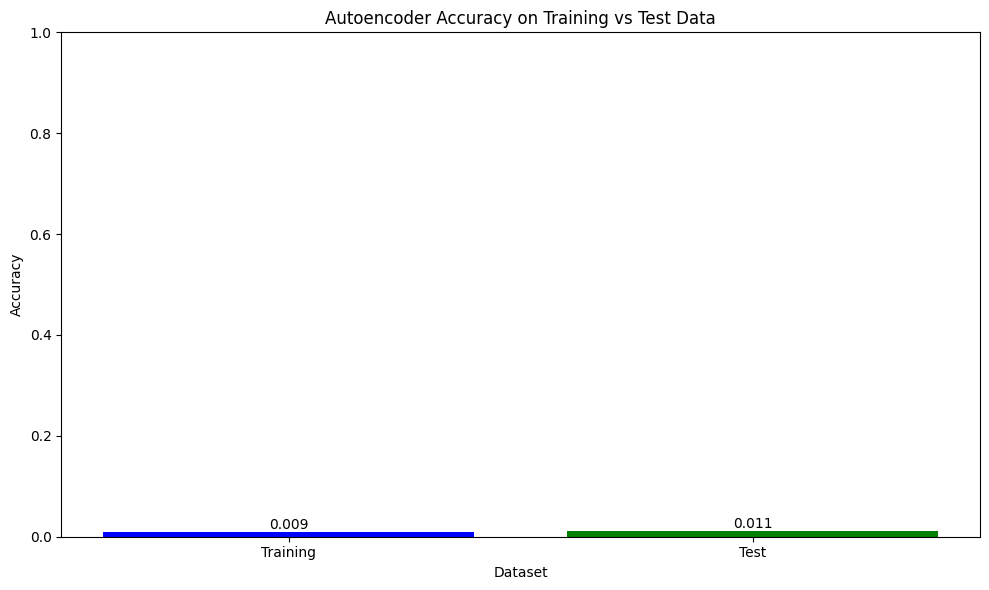

In [ ]:
# Comparison of accuracy on training and test data
# List containing accuracy values for training and test data
accuracy_values = [acc_train_auto, acc_test_auto]
# Labels for the bars on the x-axis
labels = ['Training', 'Test']

# Create bar chart
plt.figure(figsize=(10, 6))
# Creating a bar chart with labeled bars and colors
bars = plt.bar(labels, accuracy_values, color=['blue', 'green'])
# Label for the x-axis and y-axis
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Autoencoder Accuracy on Training vs Test Data')
# Setting the y-axis limits assuming accuracy is a value between 0 and 1
plt.ylim([0, 1])

# Add text labels above the bars
for bar in bars:
    # Get the height of the bar
    yval = bar.get_height()
    # Add a text label above the bar with formatted accuracy value
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, "{:.3f}".format(yval), ha='center', va='bottom')

# Show plot with proper alignment
# Adjust layout for better appearance
plt.tight_layout()
# Display the plot
plt.show()


**Storing the results:**

In [ ]:
# Storing the performance metrics of the Autoencoder model for future reference.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)


### **6.4 CNN Model**
Designed to excel in processing grid-structured data like images, Convolutional Neural Networks utilize layers such as convolutional layers, pooling layers, and fully connected layers to detect hierarchical patterns and spatial relationships. Convolutional layers act as specialized feature detectors, and pooling layers reduce the spatial dimensions, ensuring computational efficiency. While they share some unsupervised learning applications with autoencoders, such as image reconstruction, CNNs predominantly shine in supervised learning scenarios, including image classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create a more complex CNN model
cnn = Sequential()

# First convolutional layer
cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
cnn.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))

# Third convolutional layer
cnn.add(Conv1D(256, kernel_size=3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
cnn.add(Flatten())

# Dense layers
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))

# Output layer
cnn.add(Dense(1, activation='sigmoid'))

# Define your desired learning rate (e.g., 0.001)
learning_rate = 0.00001

# Create an optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))







Epoch 1/50
950/950 [==============================] - 42s 43ms/step - loss: 0.6291 - accuracy: 0.7585 - val_loss: 0.4122 - val_accuracy: 0.8059
Epoch 2/50
950/950 [==============================] - 43s 46ms/step - loss: 0.3758 - accuracy: 0.8333 - val_loss: 0.3290 - val_accuracy: 0.8552
Epoch 3/50
950/950 [==============================] - 40s 42ms/step - loss: 0.3320 - accuracy: 0.8520 - val_loss: 0.3324 - val_accuracy: 0.8573
Epoch 4/50
950/950 [==============================] - 45s 47ms/step - loss: 0.3128 - accuracy: 0.8623 - val_loss: 0.4894 - val_accuracy: 0.8204
Epoch 5/50
950/950 [==============================] - 40s 42ms/step - loss: 0.3151 - accuracy: 0.8637 - val_loss: 0.3038 - val_accuracy: 0.8629
Epoch 6/50
950/950 [==============================] - 45s 47ms/step - loss: 0.2745 - accuracy: 0.8814 - val_loss: 0.3102 - val_accuracy: 0.8649
Epoch 7/50
950/950 [==============================] - 45s 47ms/step - loss: 0.2696 - accuracy: 0.8838 - val_loss: 0.2735 - val_accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming you have already trained your model and obtained predictions on the test set
y_pred = cnn.predict(X_test)

# Convert the predicted probabilities to binary labels (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate and print classification report
classification_rep = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(classification_rep)


238/238 [==============================] - 3s 11ms/step
Confusion Matrix:
[[3651  140]
 [ 253 3555]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3791
           1       0.96      0.93      0.95      3808

    accuracy                           0.95      7599
   macro avg       0.95      0.95      0.95      7599
weighted avg       0.95      0.95      0.95      7599



In [ ]:
# Importing the NumPy library for numerical operations
import numpy as np

# Make predictions on the training and test data
y_train_pred_cnn = np.round(cnn.predict(X_train)).astype(int)
y_test_pred_cnn = np.round(cnn.predict(X_test)).astype(int)


238/238 [==============================] - 2s 10ms/step


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Add URL
random_url = "https://www.youtube.com/watch?v=VMSlN3RIa1M&t=376s"

# Preprocessing the URL
random_url_sequence = tokenizer.texts_to_sequences([random_url])
random_url_padded = pad_sequences(random_url_sequence, padding='post', maxlen=100)

# Reshape for the CNN model
random_url_padded_reshaped = np.reshape(random_url_padded, (random_url_padded.shape[0], random_url_padded.shape[1]))
print(random_url_padded_reshaped.shape)

# Making a prediction
prediction_prob = cnn.predict(random_url_padded_reshaped)
prediction_class = (prediction_prob >= 0.5).astype(int)

result = prediction_class[0][0]
if result == 0:
    print("Prediction for the URL:", random_url, "is: Legitimate")
else:
    print("Prediction for the URL:", random_url, "is: Phishing")



(1, 100)
1/1 [==============================] - 0s 95ms/step
Prediction for the URL: https://www.youtube.com/watch?v=VMSlN3RIa1M&t=376s is: 0


**Performance Evaluation:**

In [ ]:
# Calculate accuracy on training and test data
acc_train_cnn = accuracy_score(y_train, y_train_pred_cnn)
acc_test_cnn = accuracy_score(y_test, y_test_pred_cnn)

# Print accuracy results
print("CNN: Accuracy on training Data: {:.3f}".format(acc_train_cnn))
print("CNN: Accuracy on test Data: {:.3f}".format(acc_test_cnn))


CNN: Accuracy on training Data: 0.970
CNN: Accuracy on test Data: 0.948


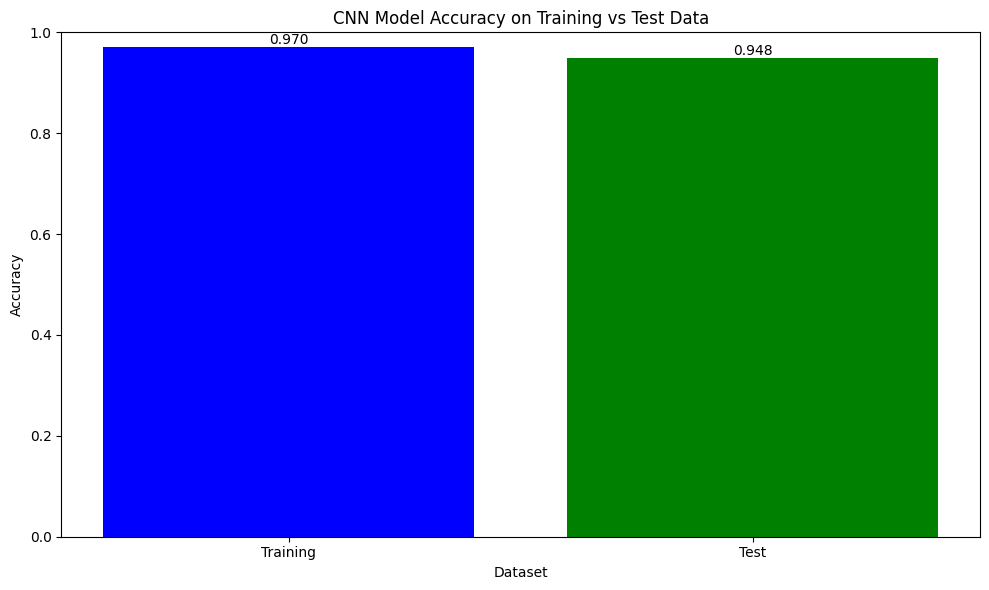

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming y_train_pred_cnn and y_test_pred_cnn are the predictions from your model
# and y_train and y_test are the true labels

# Calculate accuracy on training and test data
acc_train_cnn = accuracy_score(y_train, y_train_pred_cnn)
acc_test_cnn = accuracy_score(y_test, y_test_pred_cnn)

# Data for plotting
# List of accuracy values
accuracy_values_cnn = [acc_train_cnn, acc_test_cnn]
# Labels for the bars
labels = ['Training', 'Test']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values_cnn, color=['blue', 'green'])
# Label for the x-axis and y-axis
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
# Title of the plot
plt.title('CNN Model Accuracy on Training vs Test Data')
# Set y-axis limits assuming accuracy is a value between 0 and 1
plt.ylim([0, 1])

# Add text labels above the bars
for bar in bars:
    # Get the height of each bar
    yval = bar.get_height()
    # Add text label above each bar with 3 decimal places, centered horizontally and at the bottom vertically
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, "{:.3f}".format(yval), ha='center', va='bottom')

# Show plot with proper alignment
plt.tight_layout()
# Display the plot
plt.show()


**Storing the results:**

In [ ]:
# Saving CNN performance metrics to the respective lists.
storeResults('CNN', acc_train_cnn, acc_test_cnn)


### **6.5 RNN Model**
Recurrent Neural Networks are tailored for handling sequential data, capturing temporal patterns and varying sequence lengths. RNNs stand out from other network types due to their cyclical connections, allowing past information to influence both current and future outputs. This architecture makes them suitable for applications in time series prediction, language processing, and speech recognition. Training RNNs can present challenges, such as vanishing or exploding gradients, but these issues can be mitigated by using advanced variants like LSTMs or GRUs.

In [ ]:
# Importing the Sequential model class from Keras, which allows for the creation of a linear stack of layers in the neural network
from keras.models import Sequential

# Importing the SimpleRNN and Dense layer types from Keras
# SimpleRNN is a type of recurrent layer, and Dense is a type of fully connected layer
from keras.layers import SimpleRNN, Dense


# Create an RNN model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
950/950 [==============================] - 29s 28ms/step - loss: 0.6944 - accuracy: 0.4919 - val_loss: 0.6929 - val_accuracy: 0.4995
Epoch 2/50
950/950 [==============================] - 25s 26ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.4995
Epoch 3/50
950/950 [==============================] - 27s 29ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6929 - val_accuracy: 0.4995
Epoch 4/50
950/950 [==============================] - 24s 26ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 5/50
950/950 [==============================] - 25s 26ms/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 6/50
950/950 [==============================] - 23s 24ms/step - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6929 - val_accuracy: 0.4995
Epoch 7/50
950/950 [==============================] - 27s 28ms/step - loss: 0.6931 - accuracy: 0.4964 - val_loss: 0.6929 - val_accuracy:

In [ ]:
# Make predictions on the training and test data
y_train_pred_rnn = np.round(rnn.predict(X_train)).astype(int)
y_test_pred_rnn = np.round(rnn.predict(X_test)).astype(int)


238/238 [==============================] - 2s 7ms/step


**Performance Evaluation:**

In [ ]:
# Calculate accuracy on training and test data
acc_train_rnn = accuracy_score(y_train, y_train_pred_rnn)
acc_test_rnn = accuracy_score(y_test, y_test_pred_rnn)

# Print accuracy results
print("RNN: Accuracy on training Data: {:.3f}".format(acc_train_rnn))
print("RNN: Accuracy on test Data: {:.3f}".format(acc_test_rnn))

RNN: Accuracy on training Data: 0.500
RNN: Accuracy on test Data: 0.499


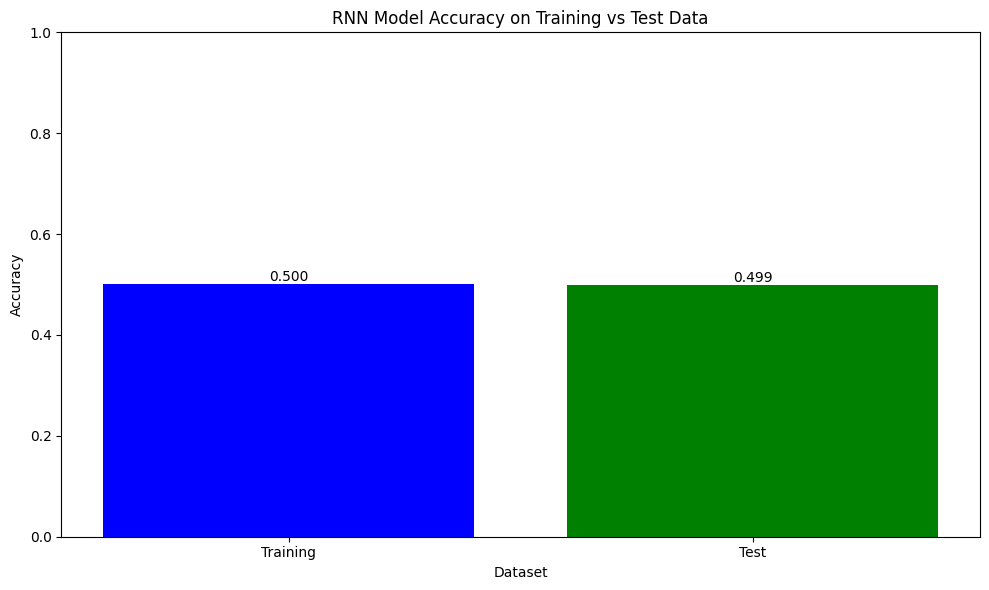

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming y_train_pred_rnn and y_test_pred_rnn are the predictions from your RNN model
# and y_train and y_test are the true labels

# Calculate accuracy on training and test data
acc_train_rnn = accuracy_score(y_train, y_train_pred_rnn)
acc_test_rnn = accuracy_score(y_test, y_test_pred_rnn)

# Data for plotting
accuracy_values_rnn = [acc_train_rnn, acc_test_rnn]
# Labels for the bars
labels = ['Training', 'Test']

# Create bar chart
plt.figure(figsize=(10, 6))
# Create bar chart with specified colors
bars = plt.bar(labels, accuracy_values_rnn, color=['blue', 'green'])
# Label for the x-axis and y-axis
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
# Title of the plot
plt.title('RNN Model Accuracy on Training vs Test Data')
plt.ylim([0, 1])  # Assuming accuracy is a value between 0 and 1

# Add text labels above the bars
for bar in bars:
    # Get the height of each bar
    yval = bar.get_height()
    # Add text label above each bar with 3 decimal places, centered horizontally and at the bottom vertically
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, "{:.3f}".format(yval), ha='center', va='bottom')

# Show plot with proper alignment
plt.tight_layout()
# Display the plot
plt.show()


**Storing the results:**

In [ ]:
# Saving RNN performance metrics to the respective lists.
storeResults('RNN', acc_train_rnn, acc_test_rnn)


# 7. Evaluation of Model Performance
To evaluate and contrast the performance of the various models, a dataframe has been established. The data for this dataframe is sourced from the lists that were previously initialized and populated with the results from each model's performance metrics.

In [ ]:
# Creating a DataFrame to store and display the performance results of various machine learning models.
# The DataFrame includes the model name, training accuracy, and test accuracy for each model.
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test
})
results


,ML Model,Train Accuracy,Test Accuracy
0,Multilayer Perceptrons,0.992,0.982
1,AutoEncoder,0.009,0.011
2,CNN,0.970,0.948
3,RNN,0.500,0.499


In [ ]:
# Sorting the results DataFrame based on 'Test Accuracy' and 'Train Accuracy' in descending order to easily compare and identify the best-performing models.
sorted_results = results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
sorted_results

,ML Model,Train Accuracy,Test Accuracy
0,Multilayer Perceptrons,0.992,0.982
2,CNN,0.970,0.948
3,RNN,0.500,0.499
1,AutoEncoder,0.009,0.011



Based on the aforementioned model comparison, it is evident that the "add the model here" demonstrates superior performance with this particular dataset.

Hence, we will proceed to preserve the model for potential future applications.

# **Save the model using Pickle**

In [ ]:
# Import the 'pickle' module to enable serialization of the model.
import pickle
# Open a file named 'phishing_classifier.pkl' in binary write mode ('wb')
with open('phishing_classifier.pkl', 'wb') as f:
  # Serialize and save the 'Multilayer Perceptrons' model to the file using pickle.
  pickle.dump(mlp, f, -1)
  # Close the file to ensure it is saved properly.
  f.close()

In [ ]:
# Loading the pre-trained machine learning model from the file "phishing_classifier.pkl"
loaded_model = pickle.load(open("phishing_classifier.pkl", "rb"))
# This displays the loaded model
loaded_model

# References




*   Somesha, M., Pais, A. R., Rao, R. S., & Rathour, V. S. (2020). Efficient deep learning techniques for the detection of phishing websites. Sādhanā, 45, 1-18.
*   Yang, R., Zheng, K., Wu, B., Wu, C., & Wang, X. (2021). Phishing website detection based on deep convolutional neural network and random forest ensemble learning. Sensors, 21(24), 8281.
*   Almousa, M., Zhang, T., Sarrafzadeh, A., & Anwar, M. (2022). Phishing website detection: How effective are deep learning‐based models and hyperparameter optimization?. Security and Privacy, 5(6), e256.
*   Cerda, B. M., Yuan, S., & Chen, L. (2021). Phishing Detection using Deep Learning. In Advances in Security, Networks, and Internet of Things: Proceedings from SAM'20, ICWN'20, ICOMP'20, and ESCS'20 (pp. 117-128). Springer International Publishing.

*   Tang, L., & Mahmoud, Q. H. (2021). A deep learning-based framework for phishing website detection. IEEE Access, 10, 1509-1521.



